<a href="https://colab.research.google.com/github/dkd99/my-code-practice/blob/main/Soln_Week_9_SQL_Coding_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Practice Coding questions**

In [ ]:
# Install SQlite & Pandasql
!pip install db-sqlite3
!pip install pandasql

# Importing Libraries
import pandas as pd
import sqlite3
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())


# Connection to DataBase
conn = sqlite3.connect('test1_database')
c = conn.cursor()


**Q1) Number of Calls between two Persons**

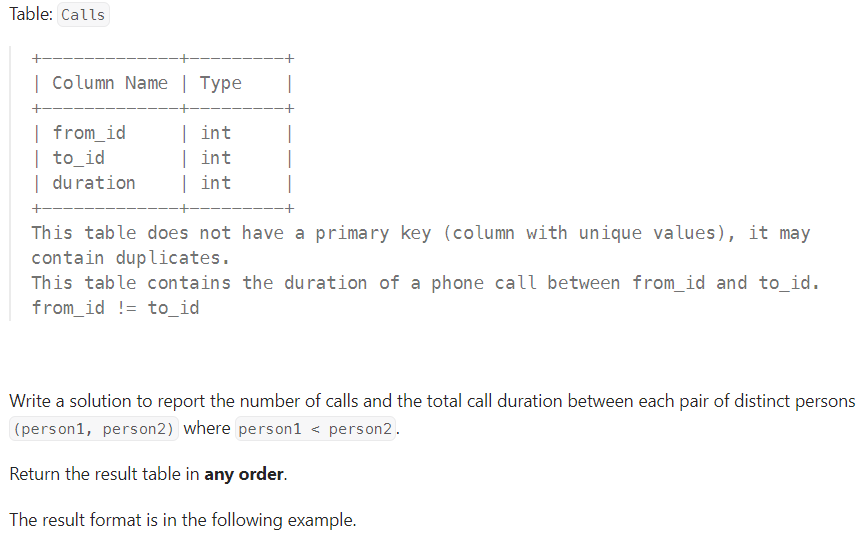

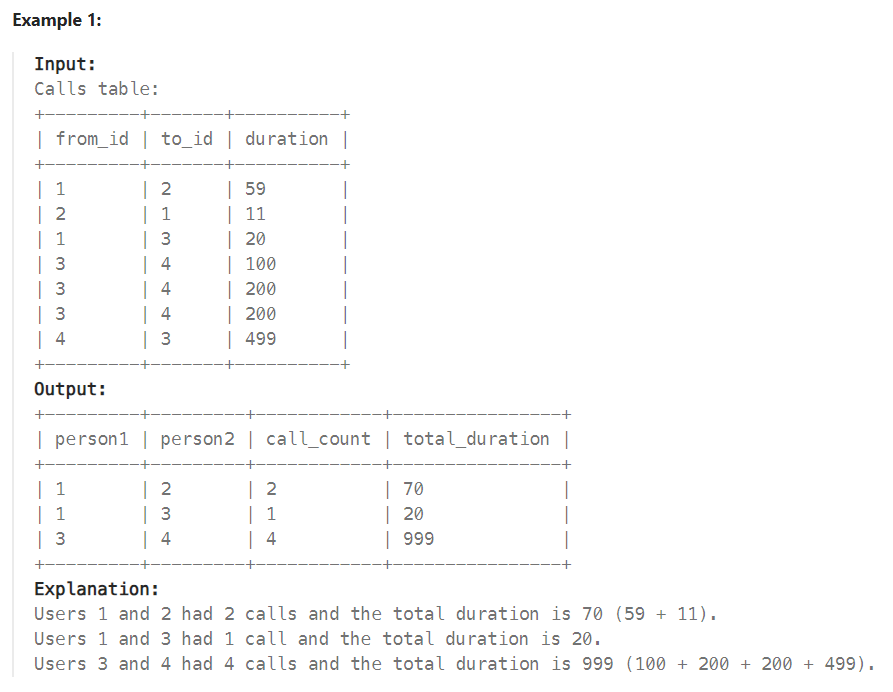

In [ ]:
# Create table
c.execute('''DROP TABLE IF EXISTS Calls;''')

c.execute('''CREATE TABLE Calls(
  from_id int,
  to_id int,
  duration int);''')

# Insert data into table
c.execute('''insert into Calls (from_id, to_id, duration)
          values ('1', '2', '59'),
                 ('2', '1', '11'),
                 ('1', '3', '20'),
                 ('3', '4', '100'),
                 ('3', '4', '200'),
                 ('3', '4', '200'),
                 ('4', '3', '499');''')



conn.commit()


# Get DataFrame

calls = pd.read_sql_query('''SELECT * FROM Calls''',conn)


In [ ]:
pd.read_sql_query('''select * from Calls''',conn)

,from_id,to_id,duration
0,1,2,59
1,2,1,11
2,1,3,20
3,3,4,100
4,3,4,200
5,3,4,200
6,4,3,499


In [ ]:
pd.read_sql_query('''SELECT
    CASE
        WHEN from_id > to_id THEN to_id
        ELSE from_id
    END AS person1,
    CASE
        WHEN from_id > to_id THEN from_id
        ELSE to_id
    END AS person2,
    COUNT(duration) AS call_count,
    SUM(duration) AS total_duration
FROM Calls
GROUP BY person2,person1;''',conn)

,person1,person2,call_count,total_duration
0,1,2,2,70
1,1,3,1,20
2,3,4,4,999


In [ ]:
# With pandas

import pandas as pd

data = [[1, 2, 59], [2, 1, 11], [1, 3, 20], [3, 4, 100], [3, 4, 200], [3, 4, 200], [4, 3, 499]]
calls = pd.DataFrame(data, columns=['from_id', 'to_id', 'duration']).astype({'from_id':'Int64', 'to_id':'Int64', 'duration':'Int64'})

def number_of_calls(calls):
    calls = pd.concat([calls, calls.rename(columns = {'from_id':'to_id', 'to_id':'from_id'})]).rename(columns = {'from_id':'person1', 'to_id':'person2'})
    return calls.loc[calls.person1 < calls.person2].groupby(by = ['person1','person2'], as_index = False).agg(call_count = ('duration','count'),total_duration = ('duration', 'sum'))

number_of_calls(calls)

,person1,person2,call_count,total_duration
0,1,2,2,70
1,1,3,1,20
2,3,4,4,999


In [ ]:
calls = pd.concat([calls, calls.rename(columns = {'from_id':'to_id', 'to_id':'from_id'})]).rename(columns = {'from_id':'person1', 'to_id':'person2'})
calls

,person1,person2,duration
0,1,2,59
1,2,1,11
2,1,3,20
3,3,4,100
4,3,4,200
5,3,4,200
6,4,3,499
0,2,1,59
1,1,2,11
2,3,1,20


**Q2) NOT Boring Movies**

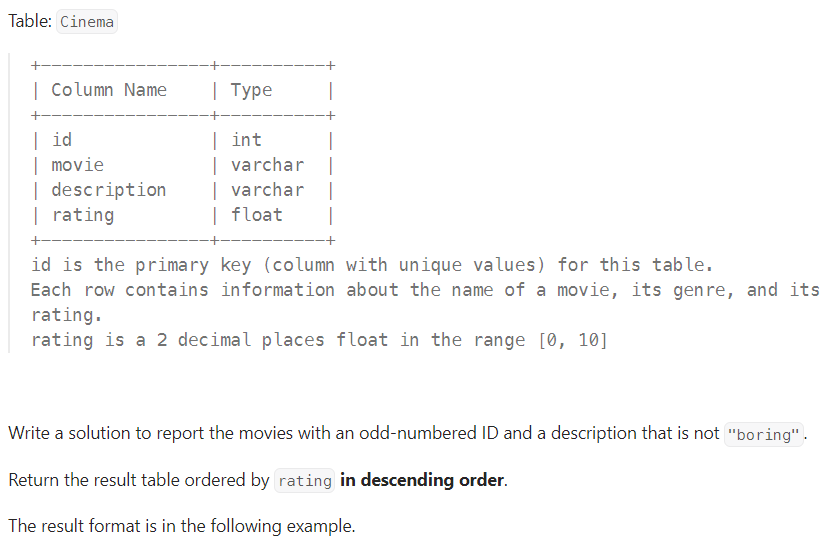

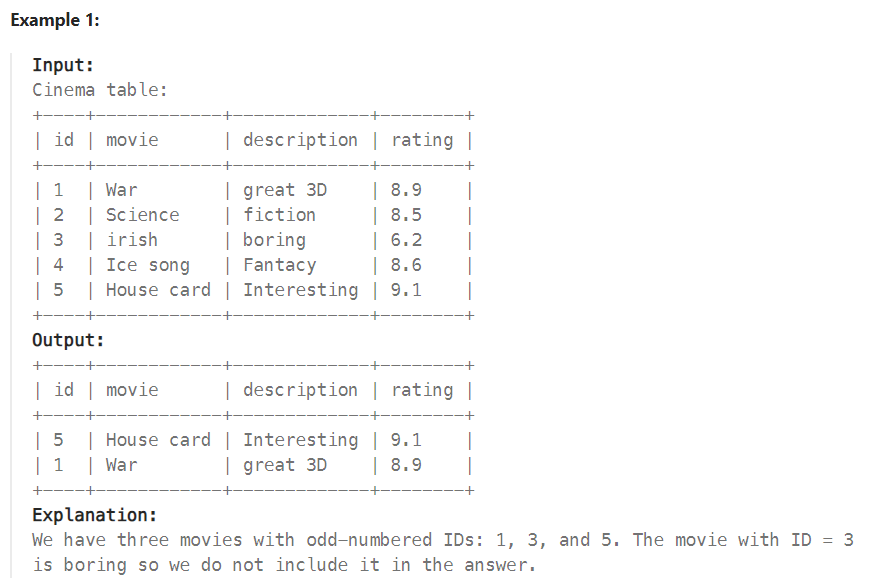

In [ ]:
# Create table
c.execute('''DROP TABLE IF EXISTS cinema;''')

c.execute('''CREATE TABLE cinema(
            id int,
            movie varchar(255),
            description varchar(255),
            rating float(2, 1));''')

# Insert data into table
c.execute('''insert into cinema (id, movie, description, rating) values ('1', 'War', 'great 3D', '8.9'),
                  ('2', 'Science', 'fiction', '8.5'),
                  ('3', 'irish', 'boring', '6.2'),
                  ('4', 'Ice song', 'Fantacy', '8.6'),
                  ('5', 'House card', 'Interesting', '9.1');''')



conn.commit()


# Get DataFrame

Cinema = pd.read_sql_query('''SELECT * FROM cinema''',conn)


In [ ]:
pd.read_sql_query('''SELECT * FROM Cinema WHERE id % 2 != 0
AND
description !="boring"
ORDER BY RATING DESC''',conn)

,id,movie,description,rating
0,5,House card,Interesting,9.1
1,1,War,great 3D,8.9


In [ ]:
# With pandas

data = [[1, 'War', 'great 3D', 8.9], [2, 'Science', 'fiction', 8.5], [3, 'irish', 'boring', 6.2], [4, 'Ice song', 'Fantacy', 8.6], [5, 'House card', 'Interesting', 9.1]]
cinema = pd.DataFrame(data, columns=['id', 'movie', 'description', 'rating']).astype({'id':'Int64', 'movie':'object', 'description':'object', 'rating':'Float64'})

def not_boring_movies(cinema):
    return cinema[
        (cinema['id'] % 2 == 1) &
        (cinema['description'] != 'boring')
    ].sort_values(by='rating', ascending=False)

not_boring_movies(cinema)

,id,movie,description,rating
4,5,House card,Interesting,9.1
0,1,War,great 3D,8.9


**Q3) Account Balance**

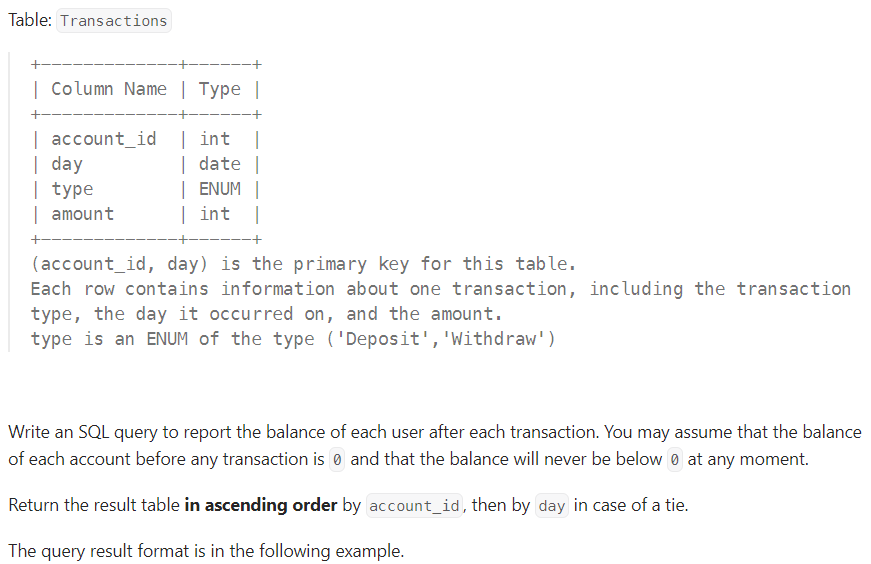

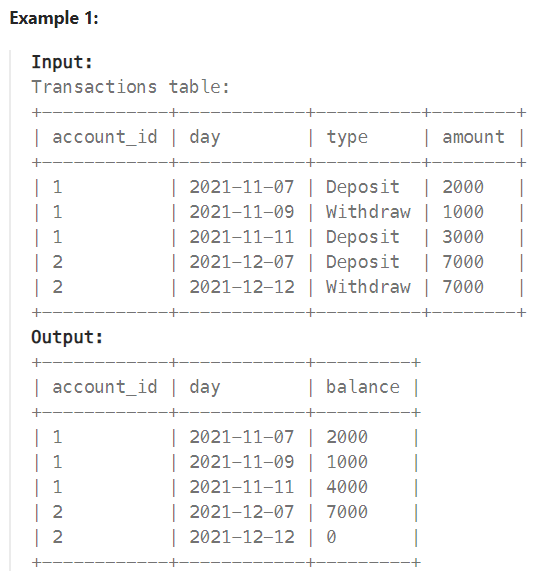

In [ ]:
# Create table
c.execute('''DROP TABLE IF EXISTS Transactions;''')

c.execute('''CREATE TABLE Transactions(account_id int, day date, type TEXT CHECK(type in ("Deposit","Withdraw")), amount int);''')

# Insert data into table
c.execute('''insert into Transactions (account_id, day, type, amount) values ('1', '2021-11-07', 'Deposit', '2000'),
                 ('1', '2021-11-09', 'Withdraw', '1000'),
                 ('1', '2021-11-11', 'Deposit', '3000'),
                 ('2', '2021-12-07', 'Deposit', '7000'),
                 ('2', '2021-12-12', 'Withdraw', '7000');''')

conn.commit()


# Get DataFrame

Cinema = pd.read_sql_query('''SELECT * FROM Transactions''',conn)


In [ ]:
pd.read_sql_query('''select account_id,
        day,
       sum(case when type = 'Deposit' then amount
        else -amount end)
        over (partition by account_id order by day asc) as balance
from Transactions
group by account_id, day;''',conn)

,account_id,day,balance
0,1,2021-11-07,2000
1,1,2021-11-09,1000
2,1,2021-11-11,4000
3,2,2021-12-07,7000
4,2,2021-12-12,0


In [ ]:
# With pandas

import numpy as np

data = [[1, '2021-11-07', 'Deposit', 2000], [1, '2021-11-09', 'Withdraw', 1000], [1, '2021-11-11', 'Deposit', 3000], [2, '2021-12-07', 'Deposit', 7000], [2, '2021-12-12', 'Withdraw', 7000]]
transactions = pd.DataFrame(data, columns=['account_id', 'day', 'type', 'amount']).astype({'account_id':'Int64', 'day':'datetime64[ns]', 'type':'object', 'amount':'Int64'})

def account_balance(transactions):
    df=transactions

    df['balance']=np.where(df['type']=="Deposit",df.amount,-1*df.amount)
    df['balance']=df['balance'].astype(int)
    df.sort_values(by=['account_id','day'],inplace=True)


    df['balance']=df[['account_id','balance']].groupby('account_id').cumsum()
    return df[['account_id','day','balance']].sort_values(by=['account_id','day'])

account_balance(transactions)

,account_id,day,balance
0,1,2021-11-07,2000
1,1,2021-11-09,1000
2,1,2021-11-11,4000
3,2,2021-12-07,7000
4,2,2021-12-12,0
